<a href="https://colab.research.google.com/github/aryan2006-saini/Machine_learning_4thSem/blob/main/Car_Purchase_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:green">Car Purchase Logistic Regression model</h1>

<h1 style="color:#1abc9c; text-align:left;">Objective of the Practical</h1>

<p style="font-size:16px; line-height:1.7;">
The objective of this practical is to develop and evaluate a
<b>Logistic Regression model</b> to predict whether a person will purchase a car
based on their <b>Age</b>, <b>Estimated Salary</b>, and <b>Gender</b>.  
The practical includes:
</p>

<ul style="font-size:16px; line-height:1.7;">
    <li>Data preprocessing and encoding categorical variables</li>
    <li>Splitting the dataset into training and test sets</li>
    <li>Training the Logistic Regression model</li>
    <li>Evaluating the model using <b>Confusion Matrix</b> and performance metrics</li>
    <li>Visualizing data with Scatter Plots, Regression Line, and Decision Boundary</li>
</ul>

<p style="font-size:16px; line-height:1.7;">
This experiment demonstrates how Logistic Regression can be effectively
used in real-world classification problems involving customer behavior prediction.
</p>


In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [96]:
import pandas as pd
import seaborn as sns

In [97]:
purchase_data = pd.read_csv('Purchase.csv')

In [98]:
purchase_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

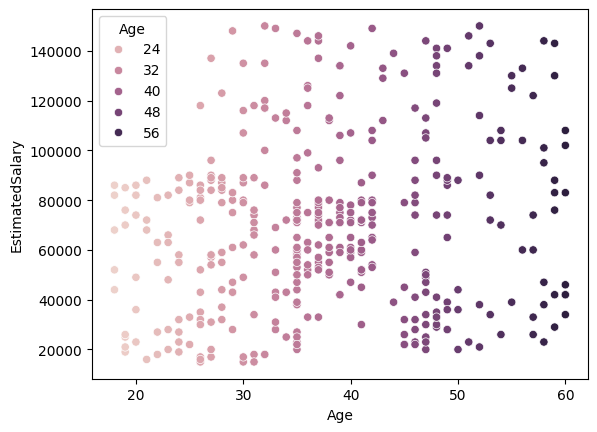

In [99]:
sns.scatterplot(x=purchase_data['Age'], y=purchase_data['EstimatedSalary'], hue= purchase_data['Age'])

In [100]:
x=purchase_data.iloc[:,[2,3]].values
y=purchase_data.iloc[:,4].values

In [101]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [102]:
x.shape

(400, 2)

In [103]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [104]:
y.shape

(400,)

In [105]:
import numpy as np

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [107]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [108]:
y_pred = model.predict(x_test)

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [110]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[48  1]
 [10 21]]


In [111]:
import matplotlib.pyplot as plt

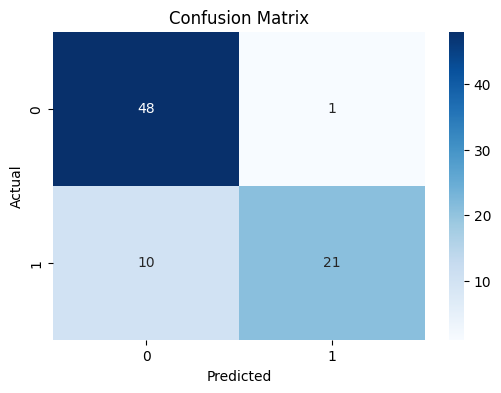

In [112]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [113]:
new_person = [[30, 60000]]


In [114]:
prediction = model.predict(new_person)
print("Prediction:", prediction)


Prediction: [0]


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

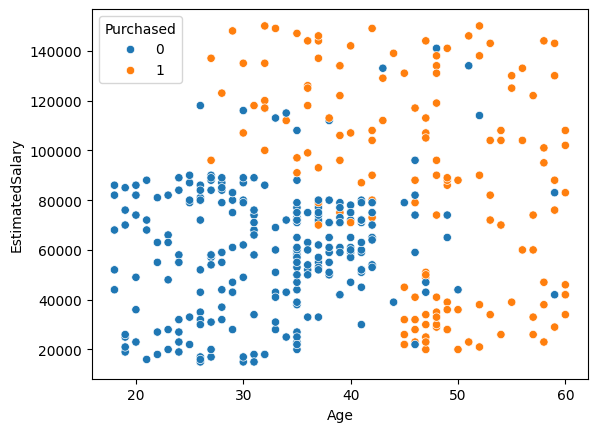

In [115]:
sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Purchased',
    data=purchase_data
)


<h1>Linear Regression line</h1>

In [116]:
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


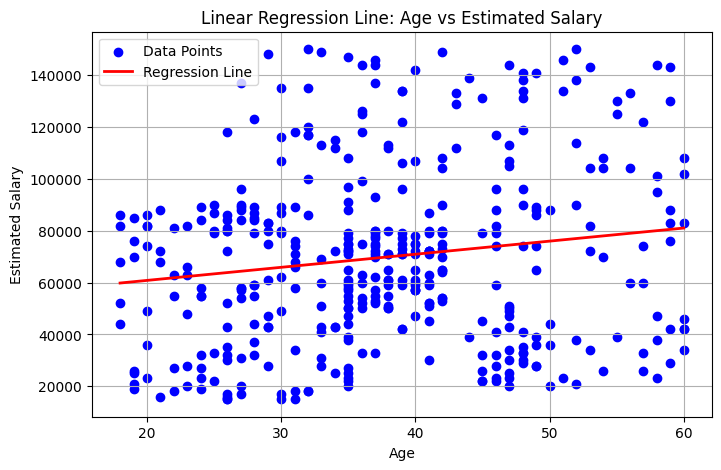

In [117]:
X = purchase_data[['Age']]
y = purchase_data['EstimatedSalary']


model = LinearRegression()
model.fit(X, y)

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)


plt.figure(figsize=(8, 5))


plt.scatter(X, y, color='blue', label='Data Points')


plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Linear Regression Line: Age vs Estimated Salary")
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color:#2c3e50;">Conclusion</h2>

<p style="font-size:16px; line-height:1.6;">
In this practical, we successfully applied <b>Logistic Regression</b>
to predict whether a user will purchase a car using Age, Estimated Salary,
and Gender as input features. The model achieved an accuracy of approximately
<b>86%</b>, indicating strong predictive performance.  
<br><br>
The confusion matrix showed that the model effectively identifies
non-buyers and performs reasonably well for buyers.  
<br><br>
Overall, this practical demonstrates the usefulness of Logistic Regression
in classification tasks and how it can be used to understand user behavior
in marketing and business applications.
</p>
